## How well do jobs and skills pay for Data Analysts?

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering data to only include salary values from the United States.

In [5]:
df_US = df[df.job_country == 'United States'].dropna(subset='salary_year_avg')

### Creating a list of the main job_titles in our dataset and filtering our dataframe to only contain these job titles.

In [9]:
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [12]:
df_US_top6 = df_US[df_US.job_title_short.isin(job_titles)]

### Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.

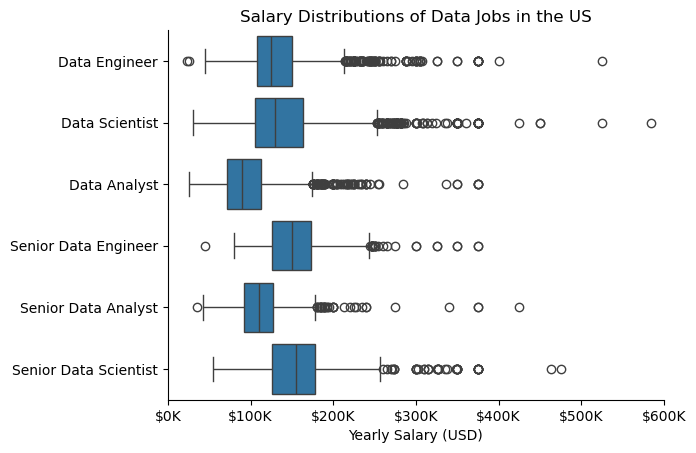

In [13]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()